In [2]:
from spectral import *
import matplotlib.pyplot as plt

import numpy as np
import scipy.constants as constants
import img
import pandas as pd

'''
h = constants.h
c = constants.c
e = math.e
pi = math.pi
k = constants.k'''

def load_flux(fluxname):

    with open(fluxname, 'r') as file:
        data = file.readlines()
        #print(data)
        size = len(data)
        #print(size)
        flux = np.zeros(size)
        wavelengths = np.zeros(size)
        for i in range(size):
            flux[i]=(float(data[i].strip().split(" ,")[1]))
            wavelengths[i]=(float(data[i].strip().split(",")[0]))

    return flux,wavelengths

def rad_list(xp,yp):
    rad = np.zeros(len(wavelengths))
    for i in range(len(wavelengths)):
        rad[i] = img_open[xp,yp,i+5]
   
# Load solar flux
flux, wavelengths = load_flux('Data/m3_solarflux.txt')
wavelengths = wavelengths[:85] #in nanometer
wavelengths = np.array(wavelengths)
wavelengths = wavelengths/1e3
#load image file
img = envi.open('Data\OBS DATA\drive-download-20240321T161103Z-001\m3g20090623t135841_v03_obs.hdr')
# Data in 3D-array 
img_open = img.open_memmap(writeable = False)


def plot(x,y):
    # Radiance
    rad = img_open[x,y,:]
    #plt.plot(np.arange(0,85,1), rad)
    ################### Reflectance #######################
    ref = rad*pi/flux  #distance is taken as 1AU
    plt.plot(wavelengths,ref)
    
def scatter(x,y):
    # Radiance
    rad = img_open[x,y,:85]
    plt.scatter(wavelengths, rad, marker='x')
img_open.shape
#img_open
img_open[0,:,0].shape
wavelengths

array([0.46098999, 0.50092001, 0.54084003, 0.58076501, 0.62068994,
       0.66060999, 0.70053754, 0.73047998, 0.75044   , 0.77040002,
       0.79036499, 0.81033002, 0.83029004, 0.85025   , 0.87020996,
       0.89017499, 0.91014001, 0.93009998, 0.95006   , 0.97002002,
       0.98997998, 1.00995001, 1.02991003, 1.04987   , 1.06982996,
       1.08979004, 1.10976001, 1.12971997, 1.14967993, 1.16964001,
       1.18959998, 1.20957007, 1.22953003, 1.24948999, 1.26944995,
       1.28941003, 1.309375  , 1.32933997, 1.34930005, 1.36926001,
       1.38921997, 1.40918506, 1.42915002, 1.44910998, 1.46907007,
       1.48903003, 1.508995  , 1.52895996, 1.54892004, 1.57885999,
       1.6187876 , 1.65871008, 1.69863001, 1.73856006, 1.77847998,
       1.81840503, 1.85833008, 1.89825   , 1.93817993, 1.97809998,
       2.01802246, 2.05794995, 2.09786987, 2.13779736, 2.17771997,
       2.21764258, 2.25757007, 2.29748999, 2.33741479, 2.37734009,
       2.41726001, 2.45718994, 2.49710986, 2.53703491, 2.57695

In [3]:
import numpy as np

# Load the .npy file
data = np.load('Data\corr_i_m3g20090623t135841_v03_rdn-002.npy')
# Now you can work with the loaded data, for example:
print(data)

[[[ 5.12939911e+01  5.21349831e+01  5.62909622e+01 ...  2.95370967e+00
    2.77168102e+00  2.70623548e+00]
  [ 5.04854507e+01  5.14119530e+01  5.62834778e+01 ...  2.94449116e+00
    2.80652915e+00  2.69159373e+00]
  [ 4.98376160e+01  5.18045959e+01  5.70392494e+01 ...  2.92051603e+00
    2.74330215e+00  2.67605024e+00]
  ...
  [ 5.56555557e+01  5.43512878e+01  5.74503975e+01 ...  3.01123926e+00
    2.84432456e+00  2.80059218e+00]
  [ 5.31521835e+01  5.30639839e+01  5.66957130e+01 ...  3.00028872e+00
    2.87921081e+00  2.81865428e+00]
  [ 6.00068436e+01  5.47982407e+01  5.77668076e+01 ...  3.03897973e+00
    2.91642588e+00  2.84588398e+00]]

 [[ 4.99596558e+01  5.17734299e+01  5.62956505e+01 ...  2.95321781e+00
    2.76755475e+00  2.68998854e+00]
  [ 5.01489410e+01  5.10767555e+01  5.56179123e+01 ...  2.93523997e+00
    2.79978398e+00  2.68446547e+00]
  [ 4.86409645e+01  5.11358109e+01  5.65933151e+01 ...  2.90664755e+00
    2.72916168e+00  2.66782463e+00]
  ...
  [ 5.77437210e+01  5.6

In [4]:
data.shape

(15446, 304, 85)

In [5]:
flux_corr_data = np.zeros(85)
for j in range(85):
    flux_corr_data[j] = data[0,0,j]/flux[j]
flux_corr_data

array([0.02535964, 0.02695004, 0.03001189, 0.03140569, 0.0345648 ,
       0.03619579, 0.03742521, 0.03923585, 0.04013555, 0.03970031,
       0.04060934, 0.04223242, 0.04411137, 0.04661222, 0.0455132 ,
       0.04506944, 0.04595341, 0.04679995, 0.04746403, 0.04805454,
       0.04834693, 0.04905047, 0.04957497, 0.04998196, 0.051101  ,
       0.05238418, 0.05350172, 0.05482775, 0.05561266, 0.05593682,
       0.05774926, 0.05786532, 0.05821885, 0.05880269, 0.05956418,
       0.06049629, 0.06103935, 0.06207577, 0.0620708 , 0.06320347,
       0.06322494, 0.06382769, 0.06461775, 0.06522668, 0.06636377,
       0.06636833, 0.06669774, 0.0677437 , 0.06636373, 0.06683818,
       0.06810063, 0.06901099, 0.06978103, 0.07133224, 0.07081289,
       0.07233892, 0.07330709, 0.07536158, 0.0762194 , 0.0766829 ,
       0.07833288, 0.07927627, 0.08031949, 0.08213896, 0.08199939,
       0.0831403 , 0.08362806, 0.08492323, 0.08692141, 0.08774448,
       0.08869343, 0.0904604 , 0.0911881 , 0.09168901, 0.09276

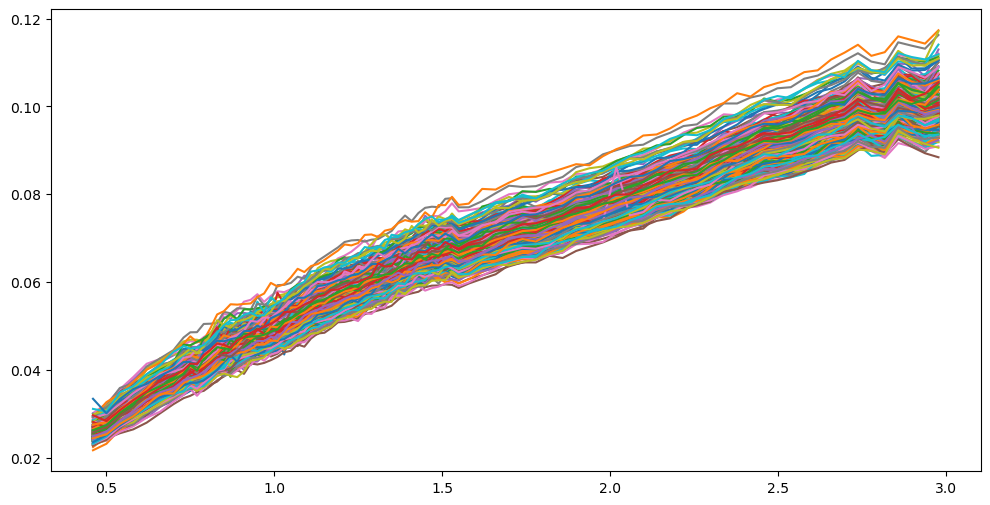

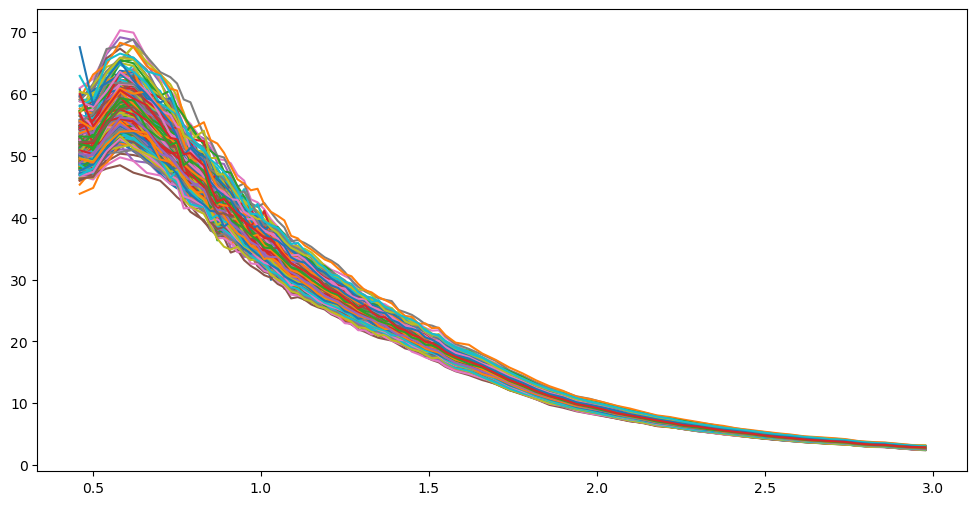

In [6]:

plt.figure(figsize=(12,6))
for i in range(len(data[0])):
    flux_corr_data = np.zeros(85)
    for j in range(85):
        flux_corr_data[j] = data[0,i,j]/flux[j]
    plt.plot(wavelengths, flux_corr_data)

plt.figure(figsize=(12,6)) 
for i in range(len(data[0])):
    plt.plot(wavelengths, data[0,i])

In [7]:
metadata = envi.read_envi_header('Data\OBS DATA\drive-download-20240321T161103Z-001\m3g20090623t135841_v03_obs.hdr')
metadata_df = pd.DataFrame.from_dict(metadata, orient='index', columns=['Value'])
band_names = metadata_df.loc['band names', 'Value']
print(band_names)

['To-Sun Azimuth (deg)', 'To-Sun Zenith (deg)', 'To-M3 Azimuth (deg)', 'To-M3 Zenith (deg)', 'Phase (deg)', 'To-Sun Path Length (au-1.014063870329)', 'To-M3 Path Length (m)', 'Facet Slope (deg)', 'Facet Aspect (deg)', 'Facet Cos(i) (unitless)']


In [8]:
import pandas as pd
bandnames = ['To-Sun Azimuth (deg)', 'To-Sun Zenith (deg)', 'To-M3 Azimuth (deg)', 'To-M3 Zenith (deg)', 'Phase (deg)', 'To-Sun Path Length (au-1.014063870329)', 'To-M3 Path Length (m)', 'Facet Slope (deg)', 'Facet Aspect (deg)', 'Facet Cos(i) (unitless)']
reshape_array = img_open.reshape(-1, img_open.shape[-1])
df = pd.DataFrame(reshape_array)
df.columns = band_names
df

,To-Sun Azimuth (deg),To-Sun Zenith (deg),To-M3 Azimuth (deg),To-M3 Zenith (deg),Phase (deg),To-Sun Path Length (au-1.014063870329),To-M3 Path Length (m),Facet Slope (deg),Facet Aspect (deg),Facet Cos(i) (unitless)
0,23.200544,17.450945,107.513466,10.868845,19.530325,-0.000003,195263.093750,3.731241,105.788330,0.954470
1,23.171261,17.448137,107.614670,10.783389,19.511438,-0.000003,195229.468750,3.590223,103.411537,0.955299
2,23.141953,17.445328,107.717735,10.697972,19.492880,-0.000003,195194.812500,3.459884,100.502304,0.956224
3,23.112627,17.442520,107.822723,10.612598,19.474649,-0.000003,195159.406250,3.370382,96.462502,0.957417
4,23.083288,17.439711,107.929665,10.527269,19.456749,-0.000003,195123.484375,3.823589,88.235794,0.960307
...,...,...,...,...,...,...,...,...,...,...
4695579,232.567657,92.446594,125.311440,15.189968,96.825905,0.000005,193741.859375,4.577205,264.389618,0.025194
4695580,232.709183,92.444832,125.489723,15.277375,96.839073,0.000005,193823.906250,5.259771,265.465485,0.034546
4695581,232.848648,92.443085,125.665367,15.364702,96.852272,0.000005,193895.187500,5.820592,285.367432,0.019247
4695582,232.991196,92.441269,125.843513,15.452260,96.865486,0.000005,193991.046875,8.517990,285.568207,0.047805


In [9]:
phase_angle = np.empty(img_open.shape[:-1])
anglecos_i = np.empty(img_open.shape[:-1])

for i in range(len(img_open)):
    for j in range(len(img_open[i])):
        for k in  range(len(img_open[i,j])):
            phase_angle[i,j] = img_open[i,j,4]
            anglecos_i[i,j] = img_open[i,j,9]
            

In [10]:
phase_angle = phase_angle.reshape((phase_angle.shape[0], phase_angle.shape[1], 1))
anglecos_i = anglecos_i.reshape((anglecos_i.shape[0], anglecos_i.shape[1], 1))

phase_angle.shape

(15446, 304, 1)

In [11]:
flux

array([2022.662109, 1934.504639, 1875.621826, 1833.137451, 1689.644409,
       1550.267334, 1428.238281, 1324.72168 , 1271.074707, 1216.917114,
       1162.946045, 1107.837036, 1053.718018,  985.262878,  946.577942,
        920.729126,  879.042053,  838.584351,  803.807495,  774.441345,
        747.215698,  714.813477,  688.451416,  660.18042 ,  627.847351,
        595.195679,  576.041504,  554.240967,  536.109741,  515.018677,
        495.133911,  478.304504,  465.552826,  448.761108,  431.568756,
        413.441162,  402.579224,  389.435547,  376.903381,  363.470428,
        352.801758,  339.575775,  326.363434,  315.832489,  305.71637 ,
        295.547668,  285.620911,  279.833801,  270.836487,  254.320526,
        239.49379 ,  222.479904,  205.766937,  188.134918,  176.529922,
        161.412659,  148.559753,  138.283081,  127.823883,  120.320206,
        112.589493,  104.922226,   97.874298,   91.578003,   84.585487,
         80.119522,   75.024551,   70.138199,   65.460922,   61.

In [12]:
# corrected data for data[0]
corr_data = np.zeros_like(data)
for i in range(len(data[0])):
    for j in range(len(data[0,0])):
        corr_data[0,i,j] = data[0,i,j]/flux[j]



Text(0.5, 1.0, 'Spectrum for 1st band')

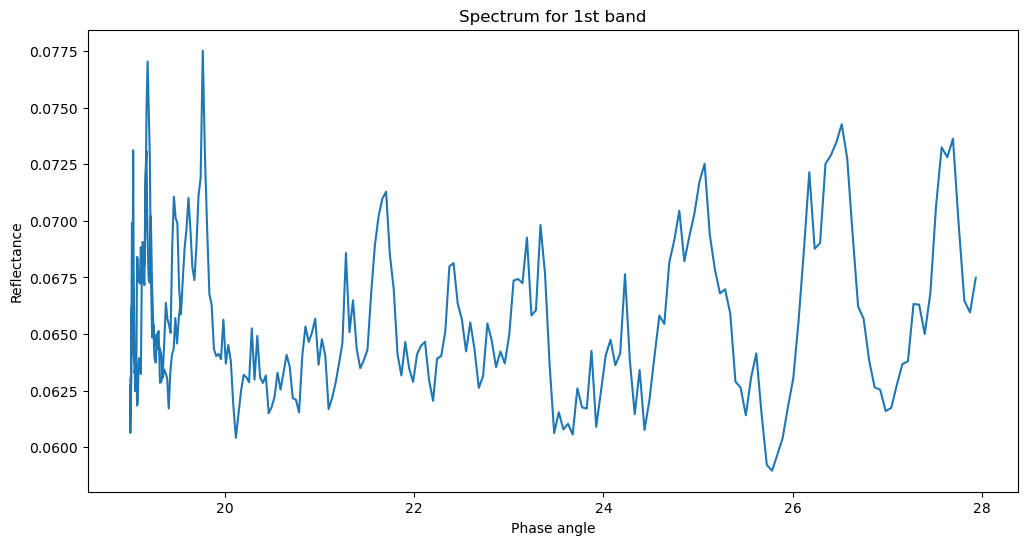

In [13]:
# plot of rad vs phase angle for the first band
corr_data_1st_band = np.zeros(shape=(304,1))
for i in range(304):
    corr_data_1st_band[i,0] = corr_data[0,i,45]
plt.figure(figsize=(12,6))
plt.plot(phase_angle[0], corr_data_1st_band)
plt.xlabel('Phase angle')
plt.ylabel('Reflectance')
plt.title('Spectrum for 1st band')

In [14]:
# correcting only the data for 1st band:
corr_data_1stband = np.zeros((data.shape[0],data.shape[1], 1))
for i in range(len(data)):
    for j in range(len(data[i])):
        corr_data_1stband[i,j,0] = data[i,j,45]/flux[45]
        
corr_data_1stband = corr_data_1stband.reshape(1,-1)
corr_data_1stband = np.squeeze(corr_data_1stband)
phase_angle_ = phase_angle.reshape(1,-1)
phase_angle_ = np.squeeze(phase_angle_)



In [15]:
corr_data_1stband.shape

(4695584,)

In [16]:

# Define phase angle bin ra# Minimum and maximum phase angle values
min_angle = np.min(phase_angle)
max_angle = np.max(phase_angle)
num_bins = 100

# Calculate the bin width
bin_width = (max_angle - min_angle) / num_bins

# Create bin ranges
bin_ranges = [(min_angle + i * bin_width, min_angle + (i + 1) * bin_width) for i in range(num_bins)]

binned_reflectance = np.zeros(len(bin_ranges))
bin_counts = np.zeros(len(bin_ranges), dtype=int)

# Bin the reflectance data based on phase angles
for i, bin_range in enumerate(bin_ranges):
    lower_bound, upper_bound = bin_range
    bin_reflectance = []
    
    # Loop through phase angles and reflectance values
    for angle, reflectance in zip(phase_angle_, corr_data_1stband):
        if lower_bound <= angle < upper_bound:
            bin_reflectance.append(reflectance)
    
    # Calculate average reflectance and count
    if bin_reflectance:
        binned_reflectance[i] = np.mean(bin_reflectance)
        bin_counts[i] = len(bin_reflectance)

# Print average reflectance and counts for each bin
for i, bin_range in enumerate(bin_ranges):
    print(f"Bin {i+1}: {bin_range}, Average Reflectance: {binned_reflectance[i]:.4f}, Data Points: {bin_counts[i]}")
    


Bin 1: (18.998735427856445, 19.777535457611084), Average Reflectance: 0.0694, Data Points: 14263
Bin 2: (19.777535457611084, 20.556335487365722), Average Reflectance: 0.0699, Data Points: 22646
Bin 3: (20.556335487365722, 21.33513551712036), Average Reflectance: 0.0650, Data Points: 27026
Bin 4: (21.33513551712036, 22.113935546875), Average Reflectance: 0.0644, Data Points: 30770
Bin 5: (22.113935546875, 22.89273557662964), Average Reflectance: 0.0635, Data Points: 34178
Bin 6: (22.89273557662964, 23.67153560638428), Average Reflectance: 0.0612, Data Points: 37361
Bin 7: (23.67153560638428, 24.450335636138917), Average Reflectance: 0.0603, Data Points: 40413
Bin 8: (24.450335636138917, 25.229135665893555), Average Reflectance: 0.0595, Data Points: 43321
Bin 9: (25.229135665893555, 26.007935695648193), Average Reflectance: 0.0565, Data Points: 46171
Bin 10: (26.007935695648193, 26.78673572540283), Average Reflectance: 0.0553, Data Points: 47894
Bin 11: (26.78673572540283, 27.56553575515

In [17]:
averaged_angle = []
for bin_tuple in bin_ranges:
    average = np.mean(bin_tuple)
    averaged_angle.append(average)

# Print the array of averages
print(averaged_angle)

[19.388135442733763, 20.166935472488404, 20.94573550224304, 21.72453553199768, 22.50333556175232, 23.282135591506957, 24.0609356212616, 24.839735651016234, 25.618535680770876, 26.39733571052551, 27.176135740280152, 27.95493577003479, 28.73373579978943, 29.512535829544067, 30.291335859298705, 31.070135889053347, 31.848935918807985, 32.62773594856262, 33.406535978317265, 34.1853360080719, 34.964136037826535, 35.74293606758118, 36.52173609733582, 37.30053612709045, 38.079336156845095, 38.85813618659973, 39.63693621635437, 40.415736246109006, 41.19453627586365, 41.97333630561829, 42.752136335372924, 43.530936365127566, 44.3097363948822, 45.08853642463684, 45.86733645439148, 46.64613648414612, 47.42493651390076, 48.203736543655396, 48.98253657341004, 49.76133660316467, 50.540136632919314, 51.31893666267395, 52.09773669242859, 52.87653672218323, 53.65533675193787, 54.4341367816925, 55.21293681144714, 55.991736841201785, 56.77053687095642, 57.54933690071106, 58.3281369304657, 59.1069369602203

In [18]:
phase_angle_.shape
corr_data_1stband.shape

(4695584,)

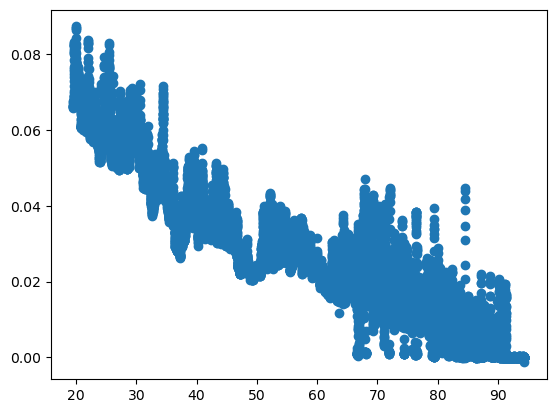

In [19]:
#plt.plot(phase_angle[:,0,0])
#plt.plot(data[:,0,45])

plt.scatter(phase_angle[:,0,0],data[:,0,45]/flux[45])

In [20]:
phase_angle[0,0:10,0],phase_angle[-1,0:10,0]

(array([19.53032494, 19.51143837, 19.49287987, 19.47464943, 19.45674896,
        19.43917656, 19.42193794, 19.4050293 , 19.38845634, 19.37221527]),
 array([94.35433197, 94.35749817, 94.36068726, 94.36390686, 94.36716461,
        94.37045288, 94.37377167, 94.3771286 , 94.38050842, 94.38392639]))

In [21]:
phase_angle[0,0,0],phase_angle[-1,0,0]

(19.530324935913086, 94.35433197021484)

In [22]:
phase_angle_binned = np.linspace(np.min(phase_angle_)+1,np.max(phase_angle_)-1,1000)
phase_angle_binned.shape

(1000,)

In [23]:
from spectres import spectres
binned_data = spectres(phase_angle_binned,phase_angle_,corr_data_1stband)

In [24]:
binned_data.shape

(1000,)

Text(0.5, 1.0, 'Spectrum for 45th band')

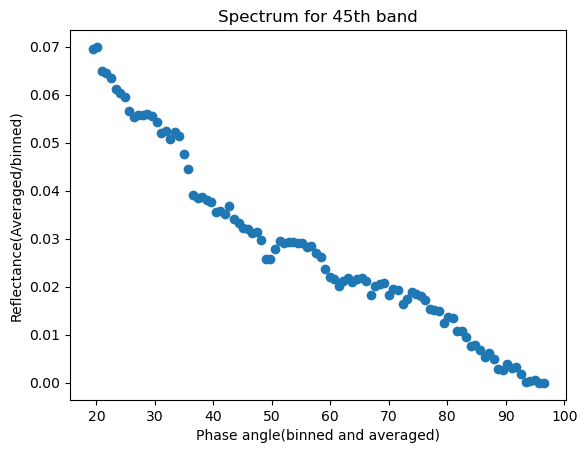

In [28]:
plt.scatter(averaged_angle,binned_reflectance)
plt.xlabel('Phase angle(binned and averaged)')
plt.ylabel('Reflectance(Averaged/binned)')
plt.title('Spectrum for 45th band')

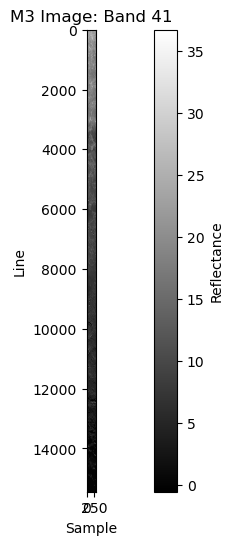

In [27]:


# Select a band to visualize (e.g., the first band)
band_index = 40

# Select a slice of the data cube corresponding to the selected band
image_data = data[:, :, band_index]

# Plot the image
plt.figure(figsize=(15, 6))
plt.imshow(image_data, cmap='gray')  # Assuming grayscale image
plt.colorbar(label='Reflectance')
plt.title(f'M3 Image: Band {band_index + 1}')
plt.xlabel('Sample')
plt.ylabel('Line')
plt.show()